In [2]:
%matplotlib inline
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

In [61]:
# Create random data and store in feature matrix X and response vector y
#X, y = make_blobs(n_samples=1500, centers=[[2, 1], [-4, -2], [1, -4]], cluster_std=0.7)
data = np.load('feature_vector.npy')

# Standardize features by removing the mean and scaling to unit variance
data = StandardScaler().fit_transform(X)

epsilon = 300
minimum_samples = 2

In [62]:
""" 
Define function to change parameters and make it simple- 
    - epsilon is a float that describes the maximum distance between two samples for them to be considered as in same 
      neighbourhood.
    - minimum_samples is number of samples in a neighbourhood for a point to be considered as a core point.
    - data is our dataset
"""

' \nDefine function to change parameters and make it simple- \n    - epsilon is a float that describes the maximum distance between two samples for them to be considered as in same \n      neighbourhood.\n    - minimum_samples is number of samples in a neighbourhood for a point to be considered as a core point.\n    - data is our dataset\n'

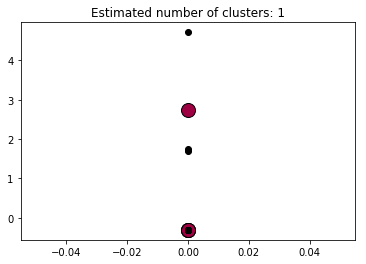

In [63]:


# Initialize DBSCAN with specified epsilon and min. samples. Fit the model with feature matrix X
db = DBSCAN(eps=epsilon, min_samples=minimum_samples).fit(data)

# Create an array of booleans using the labels from db
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

# Replace all elements with 'True' in core_samples_mask that are in cluster, 'False' if points are outliers
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Black color is removed and used for noise instead.
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)

# Create colors for the clusters.
colors = plt.get_cmap('Spectral')(np.linspace(0, 1, len(unique_labels)))

# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the data points that are clustered
    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0],
             xy[:, 1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k',
             markersize=14)

    # Plot the outliers
    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0],
             xy[:, 1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()






In [41]:
labels.shape
core_samples_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

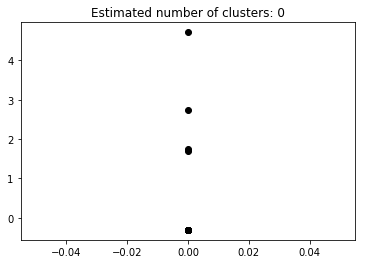

-----------------------------Program Complete---------------------------------


In [6]:

# Function object
display(0.25, 6, X)

# Acknowledgement
print('-----------------------------Program Complete---------------------------------')